In [29]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY','')

In [18]:
seasons = 'fall', 'winter', 'spring', 'summer' 
path = Path('seasons')

In [19]:
for s in seasons:
    dest = (path/s)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key,f'{s} season')
    download_images(dest, urls=results.attrgot('content_url'))


 Download of http://cdn.wallpapersafari.com/41/17/vJZX6u.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p seasons/fall
$ cd seasons/fall
$ wget -c http://cdn.wallpapersafari.com/41/17/vJZX6u.jpg
$ tar xf vJZX6u.jpg
 And re-run your code once the download is successful



In [20]:
fns = get_image_files(path)
failed = verify_images(fns)
failed

(#22) [Path('seasons/summer/00000043.jpg'),Path('seasons/summer/00000092.jpg'),Path('seasons/summer/00000096.jpg'),Path('seasons/summer/00000040.jpg'),Path('seasons/summer/00000136.jpg'),Path('seasons/summer/00000000.jpg'),Path('seasons/winter/00000018.jpg'),Path('seasons/winter/00000076.jpg'),Path('seasons/winter/00000119.jpg'),Path('seasons/winter/00000106.jpg')...]

In [21]:
failed.map(Path.unlink);

In [22]:
seasons = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.25,seed=25),
    get_y=parent_label,
    item_tfms=Resize(128)
)

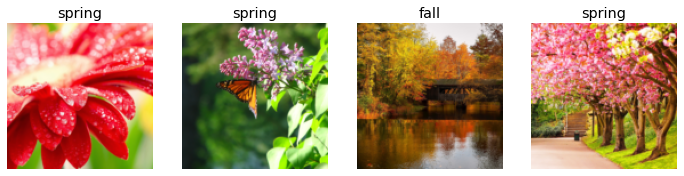

In [23]:
dls = seasons.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows=1)

In [45]:
seasons = seasons.new(
    item_tfms = RandomResizedCrop(224,min_scale=0.5),
    batch_tfms = aug_transforms()
)
dls = seasons.dataloaders(path)

In [46]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.180475,1.401235,0.424460,00:14


epoch,train_loss,valid_loss,error_rate,time
0,1.014703,0.614263,0.215827,00:15
1,0.838788,0.387769,0.122302,00:15
2,0.697965,0.330588,0.100719,00:15
3,0.603345,0.321168,0.100719,00:16
4,0.501797,0.316663,0.093525,00:16
5,0.432964,0.310874,0.086331,00:15


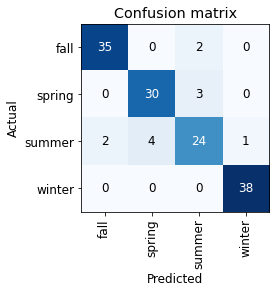

In [47]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

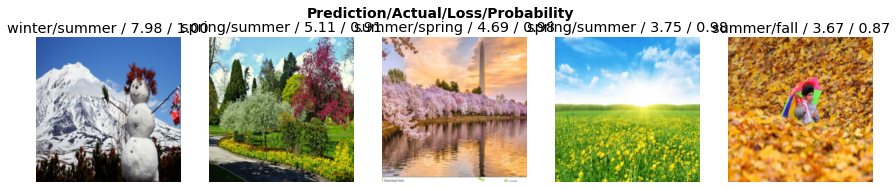

In [49]:
interp.plot_top_losses(5, nrows=1)

In [52]:
learn.export()

In [53]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]